<h2>Analyse de la concentration en fer et manganèse de l'eau de puits à Sainte-Julienne, avant et après traitement, 2023-2024</h2>

<h3>🎯Objectifs</h3>

Analyser la teneur en Fer et manganèse de l'eau d'un puits artésien situé a Sainte-Julienne, QC. Cette eau est traitée notamment par un filtre calcite et un filtre filox (dioxyde de manganèse).

L'objectif est de visualiser l'évolution des concentrations en Fe et Mn au cours du temps, au cours des saisons et des conditions météorologiques (précipitations - pluie - et températures). 

<h3>📒Le Dataset</h3>

-Fichier csv contenant les concentrations en Fe et Mn du puits, post-calcite & post-filox, ainsi que les données météorologiques de la station de St-Hippolyte, choisie pour sa proximité de Sainte-Julienne (latitude, longitude), son altitude comparable, et ses relevés quotidiens pour 2023 et 2024.

🌐Consultation des données ici :
[Données météo](https://climate.meteo.gc.ca/historical_data/search_historic_data_stations_f.html?searchType=stnName&timeframe=1&txtStationName=Hippolyte&searchMethod=contains&optLimit=yearRange&StartYear=1840&EndYear=2025&Year=2025&Month=4&Day=2&selRowPerPage=25)

Les données météo :

>Le cumul des précipitations 24h, 48h, 72h, 96h avant le jour de prélèvement (calculés)
>
>La température minimale & maximale le jour du prélèvement
>
>La moyenne de température (calculée, moyenne min - max)

<h3>🛠️Préparer l'environnement d'analyse des données</h3>

<h5>Importer les fonctionnalités python</h5>

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt

Matplotlib is building the font cache; this may take a moment.


<h5>Charger le fichier csv et convertir en dataframe</h5>

In [32]:
#inspecter le fichier csv 
import csv
with open('Compilation_data_Fe_Mn.csv', 'r') as f:
    print(len(list(csv.reader(f))))  # Compte le nombre de lignes dans le fichier CSV

80


In [2]:
#lire le csv
dataset = pd.read_csv('Compilation_data_Fe_Mn.csv') 
#Supprimer les lignes où toutes les colonnes sont NaN - lors de l'exportation de xls vers csv, 59 lignes ont ete ajoutees
dataset = dataset.dropna(how='all')  
print(dataset.head())

  Date_J_sample Fe_ppm_puits Fe_ppm_post_calcite Fe_ppm_post_filox  \
0    2023-10-15         5,50                4,93              0,31   
1    2023-10-19         4,68                4,00              0,27   
2    2023-10-24         5,23                4,90              0,04   
3    2023-10-30         3,50                1,94              0,02   
4    2023-11-04         4,03                3,17              0,02   

  Mn_ppm_puits Mn_ppm_post_calcite Mn_ppm_post_filox  Month       J-24h  \
0         4,37                4,41              4,66   10.0  2023-10-14   
1         4,33                4,03              4,85   10.0  2023-10-18   
2         4,32                4,22              4,73   10.0  2023-10-23   
3         3,49                3,55              4,25   10.0  2023-10-29   
4         3,23                3,25              3,14   11.0  2023-11-03   

        J-48h  ... Cumul _mm_72h Cumul_mm_96h Cumul_mm_120h  J_Temp_min  \
0  2023-10-13  ...           0.2          1.8        

<h3>🧹Nettoyer le dataset</h3>

In [34]:
#lister le nom des variables
dataset.columns

Index(['Date_J_sample', 'Fe_ppm_puits', 'Fe_ppm_post_calcite',
       'Fe_ppm_post_filox', 'Mn_ppm_puits', 'Mn_ppm_post_calcite',
       'Mn_ppm_post_filox', 'Month', 'J-24h', 'J-48h', 'J-72h', 'J-96h',
       'J-120h', 'J_mm', 'J-24_mm', 'J-48_mm', 'J-72_mm', 'J-96_mm',
       'J-120_mm', 'Cumul_mm_24h', 'Cumul_mm_48h', 'Cumul _mm_72h',
       'Cumul_mm_96h', 'Cumul_mm_120h', 'J_Temp_min', 'J_Temp_max',
       'J_Mean_Temp', 'J_Amplitude', 'Month_Mean_Temp_min',
       'Month_Mean_Temp_max', 'Month_Total_mm'],
      dtype='object')

In [3]:
#enlever l'espace dans le nom de variable 'Cumul _mm_72h'
dataset = dataset.rename(columns={'Cumul _mm_72h': 'Cumul_mm_72h'})

In [4]:
#enelver les colonnes inutiles
colonnes_a_supprimer = ['J-24h', 'J-48h', 'J-72h', 'J-96h',
       'J-120h', 'J_mm', 'J-24_mm', 'J-48_mm', 'J-72_mm', 'J-96_mm',
       'J-120_mm']
df = dataset.drop(columns=colonnes_a_supprimer)

In [37]:
#visualiser les 5 premieres lignes de la df
df.head()

,Date_J_sample,Fe_ppm_puits,Fe_ppm_post_calcite,Fe_ppm_post_filox,Mn_ppm_puits,Mn_ppm_post_calcite,Mn_ppm_post_filox,Month,Cumul_mm_24h,Cumul_mm_48h,Cumul_mm_72h,Cumul_mm_96h,Cumul_mm_120h,J_Temp_min,J_Temp_max,J_Mean_Temp,J_Amplitude,Month_Mean_Temp_min,Month_Mean_Temp_max,Month_Total_mm
0,2023-10-15,"5,50","4,93","0,31","4,37","4,41","4,66",10.0,0.2,0.2,0.2,1.8,1.8,4.7,12.2,8.45,7.5,13.94,6.38,121.4
1,2023-10-19,"4,68","4,00","0,27","4,33","4,03","4,85",10.0,0.0,0.0,0.0,0.2,0.2,7.7,14.8,11.25,7.1,13.94,6.38,121.4
2,2023-10-24,"5,23","4,90","0,04","4,32","4,22","4,73",10.0,0.0,9.0,21.3,27.7,27.7,-0.6,9.5,4.45,10.1,13.94,6.38,121.4
3,2023-10-30,"3,50","1,94","0,02","3,49","3,55","4,25",10.0,12.4,12.4,12.4,18.8,19.6,-1.5,2.0,0.25,3.5,13.94,6.38,121.4
4,2023-11-04,"4,03","3,17","0,02","3,23","3,25","3,14",11.0,0.0,0.0,0.0,0.0,0.4,-0.5,7.5,3.50,8.0,2.08,-5.52,0.0


In [38]:
#visualiser le data type de chaque variable
print(df.dtypes)

Date_J_sample           object
Fe_ppm_puits            object
Fe_ppm_post_calcite     object
Fe_ppm_post_filox       object
Mn_ppm_puits            object
Mn_ppm_post_calcite     object
Mn_ppm_post_filox       object
Month                  float64
Cumul_mm_24h           float64
Cumul_mm_48h           float64
Cumul_mm_72h           float64
Cumul_mm_96h           float64
Cumul_mm_120h          float64
J_Temp_min             float64
J_Temp_max             float64
J_Mean_Temp            float64
J_Amplitude            float64
Month_Mean_Temp_min    float64
Month_Mean_Temp_max    float64
Month_Total_mm         float64
dtype: object


In [5]:
#convertir Date_J_sample en type date
df['Date_J_sample'] = pd.to_datetime(df['Date_J_sample'])

In [40]:
df['Date_J_sample'].head()

0   2023-10-15
1   2023-10-19
2   2023-10-24
3   2023-10-30
4   2023-11-04
Name: Date_J_sample, dtype: datetime64[ns]

In [6]:
#standardiser le format des concentrations (remplacer le ',' par '.'
colonnes_concentration = [
    'Fe_ppm_puits', 
    'Fe_ppm_post_calcite', 
    'Fe_ppm_post_filox',
    'Mn_ppm_puits', 
    'Mn_ppm_post_calcite', 
    'Mn_ppm_post_filox'
]

for colonne in colonnes_concentration:
    # Convertir en string, puis remplacer les symboles '<' et ','
    df[colonne] = df[colonne].astype(str).str.replace('<', '').str.replace(',', '.')
    # Convertir en float après nettoyage
    df[colonne] = pd.to_numeric(df[colonne], errors='coerce')

In [7]:
print(df.dtypes)

Date_J_sample          datetime64[ns]
Fe_ppm_puits                  float64
Fe_ppm_post_calcite           float64
Fe_ppm_post_filox             float64
Mn_ppm_puits                  float64
Mn_ppm_post_calcite           float64
Mn_ppm_post_filox             float64
Month                         float64
Cumul_mm_24h                  float64
Cumul_mm_48h                  float64
Cumul_mm_72h                  float64
Cumul_mm_96h                  float64
Cumul_mm_120h                 float64
J_Temp_min                    float64
J_Temp_max                    float64
J_Mean_Temp                   float64
J_Amplitude                   float64
Month_Mean_Temp_min           float64
Month_Mean_Temp_max           float64
Month_Total_mm                float64
dtype: object


In [43]:
# Nombre de valeurs manquantes par colonne 'NaN' 
#la date du 28 nov 2023 a ete ajoutée comme NaN pour créer le gap dans les visualisations
print(df.isna().sum())  

Date_J_sample          0
Fe_ppm_puits           1
Fe_ppm_post_calcite    2
Fe_ppm_post_filox      2
Mn_ppm_puits           1
Mn_ppm_post_calcite    2
Mn_ppm_post_filox      2
Month                  0
Cumul_mm_24h           1
Cumul_mm_48h           1
Cumul_mm_72h           1
Cumul_mm_96h           1
Cumul_mm_120h          1
J_Temp_min             1
J_Temp_max             1
J_Mean_Temp            1
J_Amplitude            1
Month_Mean_Temp_min    1
Month_Mean_Temp_max    1
Month_Total_mm         1
dtype: int64


<h3>🔍Explorer le dataset</h3>

In [15]:
#stat descriptive
df.describe()

,Date_J_sample,Fe_ppm_puits,Fe_ppm_post_calcite,Fe_ppm_post_filox,Mn_ppm_puits,Mn_ppm_post_calcite,Mn_ppm_post_filox,Month,Cumul_mm_24h,Cumul_mm_48h,Cumul_mm_72h,Cumul_mm_96h,Cumul_mm_120h,J_Temp_min,J_Temp_max,J_Mean_Temp,J_Amplitude,Month_Mean_Temp_min,Month_Mean_Temp_max,Month_Total_mm
count,20,20.000000,19.000000,19.000000,20.000000,19.000000,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,2024-05-21 15:36:00,2.925000,1.464211,0.057895,2.794500,2.758421,2.750526,10.000000,2.170000,3.535000,5.375000,6.945000,7.715000,2.545000,11.450000,6.997500,8.905000,11.128000,2.283500,54.76500
min,2023-10-15 00:00:00,1.050000,0.030000,0.020000,1.720000,1.530000,1.320000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.200000,-2.400000,-6.100000,2.900000,-3.280000,-12.250000,0.00000
25%,2023-11-10 18:00:00,1.872500,0.030000,0.030000,2.172500,2.255000,1.825000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.425000,2.225000,0.200000,5.100000,2.080000,-5.520000,0.00000
50%,2024-07-28 12:00:00,2.545000,0.040000,0.030000,2.605000,2.460000,2.420000,10.000000,0.000000,0.000000,0.300000,1.250000,1.250000,0.900000,12.400000,6.675000,8.250000,13.890000,4.860000,48.65000
75%,2024-10-11 18:00:00,4.015000,3.360000,0.035000,3.132500,3.315000,3.695000,11.000000,0.050000,5.550000,8.400000,8.400000,9.150000,9.825000,18.600000,15.137500,13.350000,21.340000,10.440000,121.40000
max,2024-12-31 00:00:00,5.500000,4.930000,0.310000,4.370000,4.410000,4.850000,12.000000,29.400000,29.400000,29.400000,29.400000,32.400000,12.800000,25.500000,18.850000,14.600000,26.150000,15.080000,152.70000
std,NaN,1.371908,2.008483,0.082231,0.828712,0.872883,1.217646,1.555973,6.977943,7.152201,8.202431,9.782287,10.880706,7.511849,9.581314,8.333374,4.321851,10.328185,9.428536,58.68339


<h5>✅Distribution des concentrations Fe et Mn du puits</h5>

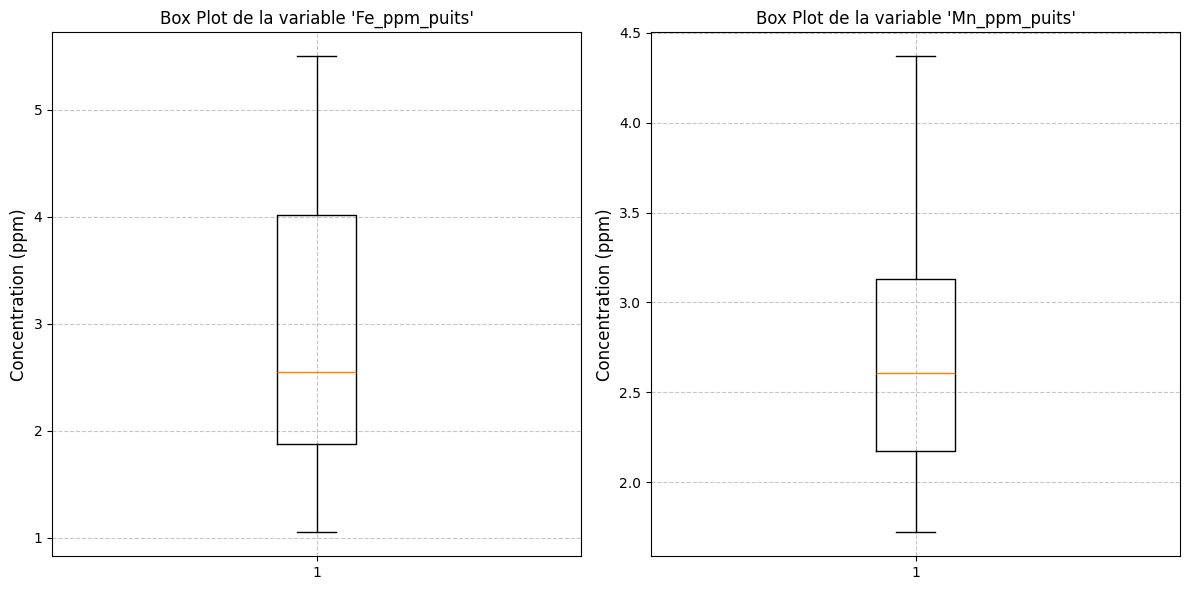

In [24]:
#du a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt

# Créer une figure avec une grille 1x2
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 

# Création des box plots
ax[0].boxplot(df['Fe_ppm_puits'])
ax[1].boxplot(df['Mn_ppm_puits'])

# Ajouter les titres aux graphiques individuels
ax[0].set_title("Box Plot de la variable 'Fe_ppm_puits'", fontsize=12)
ax[1].set_title("Box Plot de la variable 'Mn_ppm_puits'", fontsize=12)

# Ajouter les labels des axes Y aux deux graphiques
for axe in ax:
    axe.set_ylabel('Concentration (ppm)', fontsize=12)
    axe.grid(True, linestyle='--', alpha=0.7)

# Affichage des graphiques
plt.tight_layout()  # Ajustement pour éviter les chevauchements
plt.show()

<h3>📊Visualisations</h3>

<h5>✅Tendance Fe et Mn du puits 2023-2024</h5>

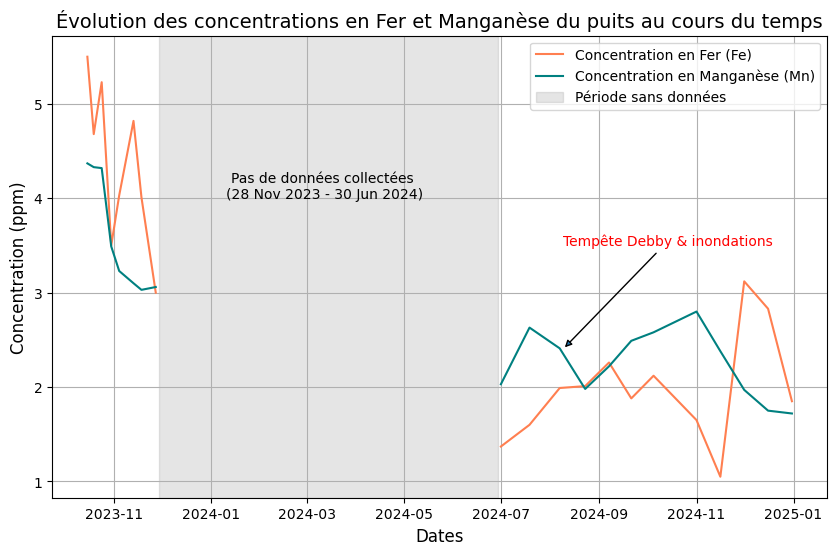

In [123]:
#dû a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt
#lineplot
plt.figure(figsize=(10, 6))
plt.plot(df['Date_J_sample'], df['Fe_ppm_puits'], label='Concentration en Fer (Fe)', color='coral')
plt.plot(df['Date_J_sample'], df['Mn_ppm_puits'], label='Concentration en Manganèse (Mn)', color='teal')
# Annoter le 9 août 2024
# Convertir la date au format datetime
date_annotee = pd.to_datetime('2024-08-09')
# Ajouter une annotation pour les inondations du 9 aout 2024
plt.annotate(
    'Tempête Debby & inondations',  # Texte de l'annotation
    xy=(date_annotee, 2.4),  # Coordonnées du point annoté
    xytext=(date_annotee, 3.5),  # Position du texte avec la même valeur de 'x'
    arrowprops=dict(arrowstyle='-|>'),
    fontsize=10, color='red')  # Style du texte
#Ajouter une annotation pour les echantillons manquants entre fin novembre 2023 et juillet 2024
# Créer un rectangle pour la période manquante
plt.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2, label='Période sans données'
)
# Ajouter une annotation pour indiquer la période
plt.annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 4),# Position centrale pour la période
    ha='center', fontsize=10, color='black'
)
# Ajouter des titres et légendes
plt.title('Évolution des concentrations en Fer et Manganèse du puits au cours du temps', fontsize=14)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Concentration (ppm)', fontsize=12)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

<h5>✅Tendance Fe et Mn puits, post Calcite et post Filox 2023-2024</h5>

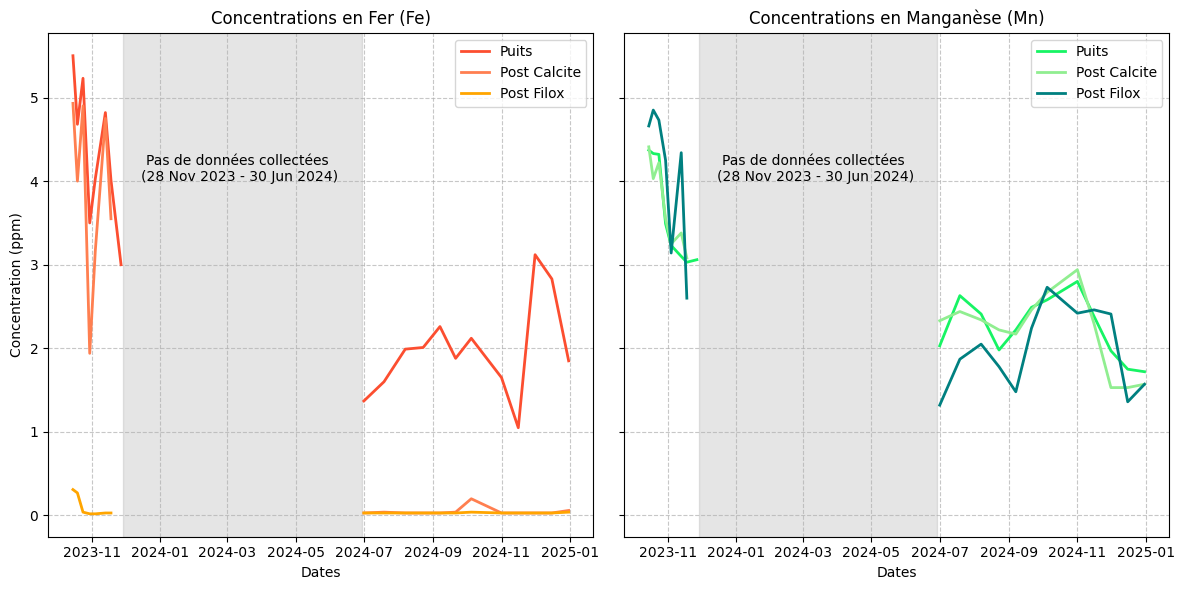

In [45]:
#dû a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt
# Création de la figure et des sous-graphiques
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # Partage de l'axe Y

# Bar plot pour le Fer (Fe)
ax[0].plot(df['Date_J_sample'], df['Fe_ppm_puits'], label='Puits', color='#fc4e30', linewidth=2)
ax[0].plot(df['Date_J_sample'], df['Fe_ppm_post_calcite'], label='Post Calcite', color='coral', linewidth=2)
ax[0].plot(df['Date_J_sample'], df['Fe_ppm_post_filox'], label='Post Filox', color='orange', linewidth=2)
ax[0].set_title("Concentrations en Fer (Fe)", fontsize=12)
ax[0].set_xlabel("Dates", fontsize=10)
ax[0].set_ylabel("Concentration (ppm)", fontsize=10)
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.7)
#Ajouter une annotation pour les echantillons manquants entre fin novembre 2023 et juillet 2024
# Créer un rectangle pour la période manquante
ax[0].axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2, label='Période sans données'
)
# Ajouter une annotation pour indiquer la période
ax[0].annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 4),# Position centrale pour la période
    ha='center', fontsize=10, color='black'
)
# Bar plot pour le Manganèse (Mn)
ax[1].plot(df['Date_J_sample'], df['Mn_ppm_puits'], label='Puits', color='#17f464', linewidth=2)
ax[1].plot(df['Date_J_sample'], df['Mn_ppm_post_calcite'], label='Post Calcite', color='lightgreen', linewidth=2)
ax[1].plot(df['Date_J_sample'], df['Mn_ppm_post_filox'], label='Post Filox', color='teal', linewidth=2)
ax[1].set_title("Concentrations en Manganèse (Mn)", fontsize=12)
ax[1].set_xlabel("Dates", fontsize=10)
ax[1].legend()
ax[1].grid(True, linestyle='--', alpha=0.7)
#Ajouter une annotation pour les echantillons manquants entre fin novembre 2023 et juillet 2024
# Créer un rectangle pour la période manquante
ax[1].axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2, label='Période sans données'
)
# Ajouter une annotation pour indiquer la période
ax[1].annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 4),# Position centrale pour la période
    ha='center', fontsize=10, color='black'
)
# Ajustement des espacements
plt.tight_layout()
plt.show()

>✔️Le fer est filtré par la calcite.
>
>✔️Le Mn n'est pas filtré par le filox.
> 
>❓Est-qu'il y a une différence significative entre les concentrations de Mn dans le puits vs calcite vs filox ?

<h5>✅Tendance Fe/Mn vs cumul précipitations, 2023-2024</h5>

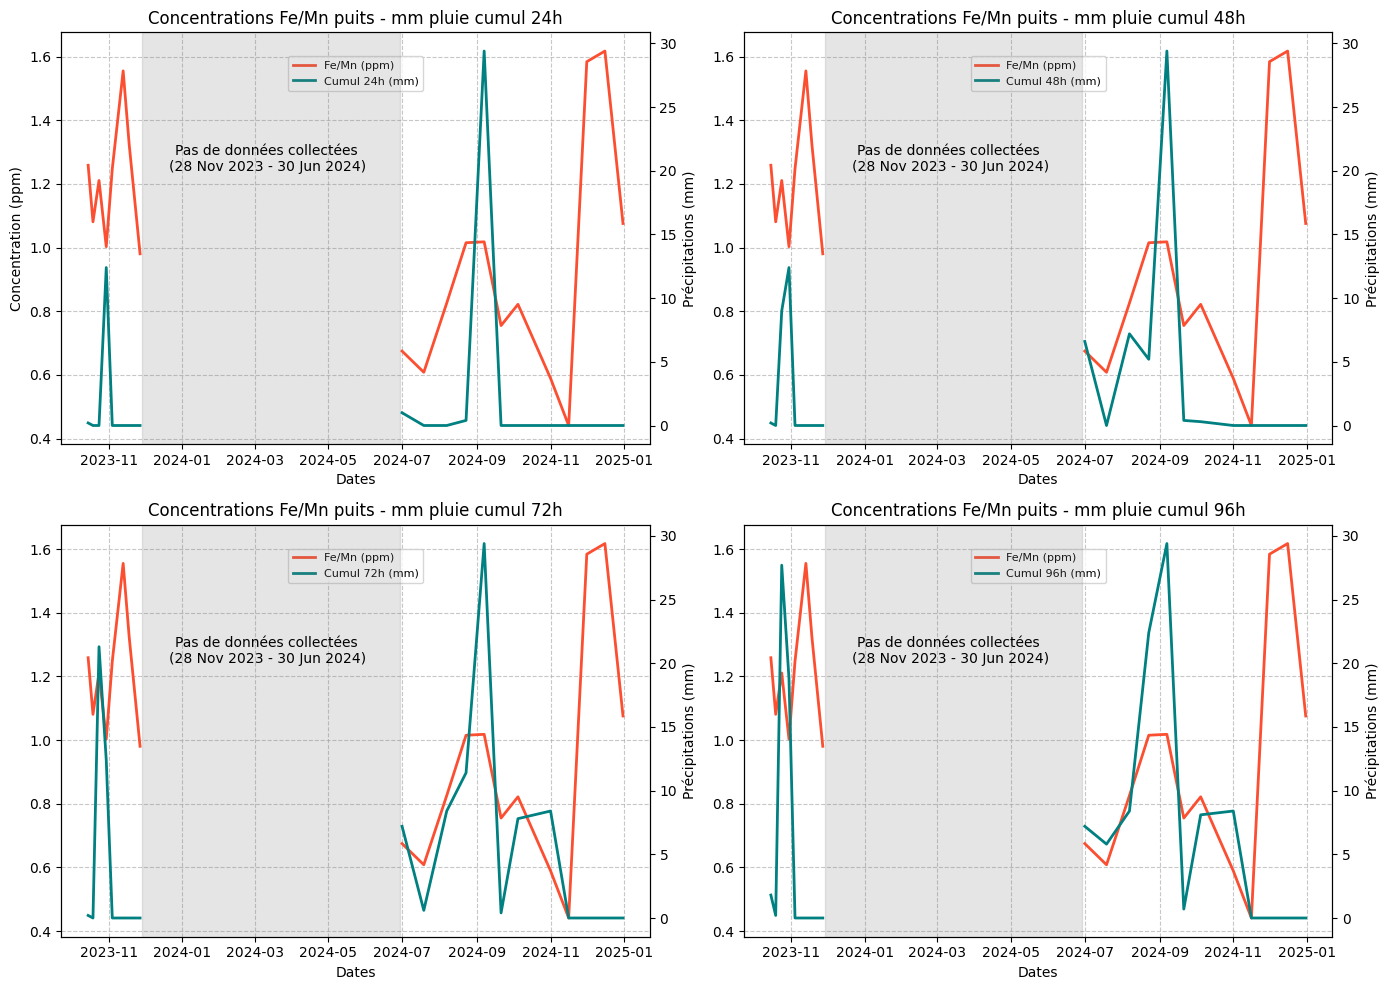

In [59]:
#dû a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt
# Création de la figure et de la grille 2x2
fig, ax = plt.subplots(2, 2, figsize=(14, 10))  # Grille 2x2 pour 4 sous-graphes

# Premier plot (cumul 24h)
ax[0, 0].plot(df['Date_J_sample'], df['Fe/Mn_ppm'], label='Fe/Mn (ppm)', color='#fc4e30', linewidth=2)
ax2_00 = ax[0, 0].twinx()
ax2_00.set_ylabel('Précipitations (mm)')
ax2_00.plot(df['Date_J_sample'], df['Cumul_mm_24h'], label='Cumul 24h (mm)', color='teal', linewidth=2)
ax[0, 0].set_title("Concentrations Fe/Mn puits - mm pluie cumul 24h", fontsize=12)
ax[0, 0].set_xlabel("Dates", fontsize=10)
ax[0, 0].set_ylabel("Concentration (ppm)", fontsize=10)
ax[0, 0].grid(True, linestyle='--', alpha=0.7)
# Créer un rectangle pour la période manquante
ax2_00.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2)
# Ajouter une annotation pour indiquer la période
ax2_00.annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 20),# Position centrale pour la période
    ha='center', fontsize=10, color='black')
# Récupérer les objets et étiquettes des deux axes
lines, labels = ax[0, 0].get_legend_handles_labels()
lines2, labels2 = ax2_00.get_legend_handles_labels()
# Ajouter une légende combinée
ax[0, 0].legend(lines + lines2, labels + labels2, loc="center", fontsize=8, bbox_to_anchor=(0.5, 0.9))

# Deuxième plot (cumul 48h)
ax[0, 1].plot(df['Date_J_sample'], df['Fe/Mn_ppm'], label='Fe/Mn (ppm)', color='#fc4e30', linewidth=2)
ax2_01 = ax[0, 1].twinx()
ax2_01.set_ylabel('Précipitations (mm)')
ax2_01.plot(df['Date_J_sample'], df['Cumul_mm_48h'], label='Cumul 48h (mm)', color='teal', linewidth=2)

ax[0, 1].set_title("Concentrations Fe/Mn puits - mm pluie cumul 48h", fontsize=12)
ax[0, 1].set_xlabel("Dates", fontsize=10)
ax[0, 1].grid(True, linestyle='--', alpha=0.7)
# Créer un rectangle pour la période manquante
ax2_01.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2)
# Ajouter une annotation pour indiquer la période
ax2_01.annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 20),# Position centrale pour la période
    ha='center', fontsize=10, color='black')
# Récupérer les objets et étiquettes des deux axes
lines, labels = ax[0, 1].get_legend_handles_labels()
lines2, labels2 = ax2_01.get_legend_handles_labels()
# Ajouter une légende combinée
ax[0, 1].legend(lines + lines2, labels + labels2, loc="center", fontsize=8, bbox_to_anchor=(0.5, 0.9))

# Troisième plot (cumul 72h)
ax[1, 0].plot(df['Date_J_sample'], df['Fe/Mn_ppm'], label='Fe/Mn (ppm)', color='#fc4e30', linewidth=2)
ax2_10 = ax[1, 0].twinx()
ax2_10.set_ylabel('Précipitations (mm)')
ax2_10.plot(df['Date_J_sample'], df['Cumul_mm_72h'], label='Cumul 72h (mm)', color='teal', linewidth=2)
ax[1, 0].set_title("Concentrations Fe/Mn puits - mm pluie cumul 72h", fontsize=12)
ax[1, 0].set_xlabel("Dates", fontsize=10)
ax[1, 0].grid(True, linestyle='--', alpha=0.7)
# Créer un rectangle pour la période manquante
ax2_10.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2)
# Ajouter une annotation pour indiquer la période
ax2_10.annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 20),# Position centrale pour la période
    ha='center', fontsize=10, color='black')
# Récupérer les objets et étiquettes des deux axes
lines, labels = ax[1, 0].get_legend_handles_labels()
lines2, labels2 = ax2_10.get_legend_handles_labels()
# Ajouter une légende combinée
ax[1, 0].legend(lines + lines2, labels + labels2, loc="center", fontsize=8, bbox_to_anchor=(0.5, 0.9))

# Quatrième plot (cumul 96h)
ax[1, 1].plot(df['Date_J_sample'], df['Fe/Mn_ppm'], label='Fe/Mn (ppm)', color='#fc4e30', linewidth=2)
ax2_11 = ax[1, 1].twinx()
ax2_11.set_ylabel('Précipitations (mm)')
ax2_11.plot(df['Date_J_sample'], df['Cumul_mm_96h'], label='Cumul 96h (mm)', color='teal', linewidth=2)
ax[1, 1].set_title("Concentrations Fe/Mn puits - mm pluie cumul 96h", fontsize=12)
ax[1, 1].set_xlabel("Dates", fontsize=10)
ax[1, 1].grid(True, linestyle='--', alpha=0.7)
# Créer un rectangle pour la période manquante
ax2_11.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2)
# Ajouter une annotation pour indiquer la période
ax2_11.annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 20),# Position centrale pour la période
    ha='center', fontsize=10, color='black')
# Récupérer les objets et étiquettes des deux axes
lines, labels = ax[1, 1].get_legend_handles_labels()
lines2, labels2 = ax2_11.get_legend_handles_labels()
# Ajouter une légende combinée
ax[1, 1].legend(lines + lines2, labels + labels2, loc="center", fontsize=8, bbox_to_anchor=(0.5, 0.9))

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
# Afficher le graphique
plt.show()

>✔️La concentration Fe/Mn fluctue selon les précipitations.
>
>✔️La corrélation est visible avec le cumul à 72h.

<h5>✅Tendance Fe/Mn vs cumul précipitations 72h, 2023-2024</h5>

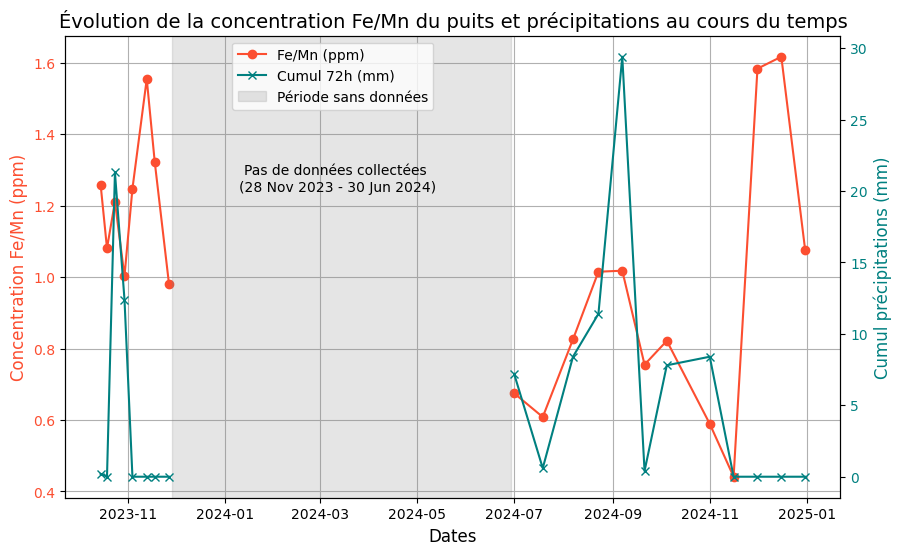

In [51]:
#dû a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt
# Calcul de la somme Fe + Mn
df['Fe/Mn_ppm'] = df['Fe_ppm_puits'] / df['Mn_ppm_puits']
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Premier axe Y (Fe + Mn)
ax1.plot(df['Date_J_sample'], df['Fe/Mn_ppm'], label='Fe/Mn (ppm)', color='#fc4e30',marker='o', linestyle='-')
ax1.set_xlabel('Dates', fontsize=12)
ax1.set_ylabel('Concentration Fe/Mn (ppm)', color='#fc4e30', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#fc4e30')
ax1.grid(True)
# Deuxième axe Y (Cumul précipitations 72h)
ax2 = ax1.twinx()  # Partage le même axe X
ax2.plot(df['Date_J_sample'], df['Cumul_mm_72h'], label='Cumul 72h (mm)', color='teal',marker='x', markersize=6,linestyle='-')
ax2.set_ylabel('Cumul précipitations (mm)', color='teal', fontsize=12)
ax2.tick_params(axis='y', labelcolor='teal')

#Ajouter une annotation pour les echantillons manquants entre fin novembre 2023 et juillet 2024
# Créer un rectangle pour la période manquante
plt.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2, label='Période sans données'
)
# Ajouter une annotation pour indiquer la période
plt.annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 20),# Position centrale pour la période
    ha='center', fontsize=10, color='black')
# Ajouter la légende complète
fig.legend(
    loc='upper right', fontsize=10, bbox_to_anchor=(0.5, 0.88)
)
plt.title('Évolution de la concentration Fe/Mn du puits et précipitations au cours du temps', fontsize=14)

# Afficher le graphique
plt.show()

>✔️Le ratio Fe/Mn augmente avec les précipitations cumul 72h entre juillet et novembre.
>
>✔️ Le ratio Fe/Mn augmente significativement à la mi-novembre 2024 (comparable à 2023) lorsque les précipitations (pluies) sont nulles.
>
>❓ Est-ce que les précipitations (Cumul 72h) influencent la concentration en Fe en dehors de l'hiver ?

<h5>✅Concentrations en Fer/Mn du puits vs saison & cumul précipitations 24h, 48h, 72h, 96h - 2023-2024</h5>

In [107]:
# Fonction pour définir les saisons au Québec
def determiner_saison_qc(date):
    mois = date.month
    if mois in [11,12, 1, 2, 3]:  #inclure novembre :)
        return 'hiver'
    elif mois in [4, 5]:  
        return 'printemps'
    elif mois in [6, 7, 8, 9]:  
        return 'été'
    elif mois in [10]: 
        return 'automne'

# Ajouter la colonne 'Season' basée sur la logique pour le Québec
df['Season'] = df['Date_J_sample'].apply(determiner_saison_qc)

# Vérifier les données
print(df[['Date_J_sample', 'Season']].head())

  Date_J_sample   Season
0    2023-10-15  automne
1    2023-10-19  automne
2    2023-10-24  automne
3    2023-10-30  automne
4    2023-11-04    hiver


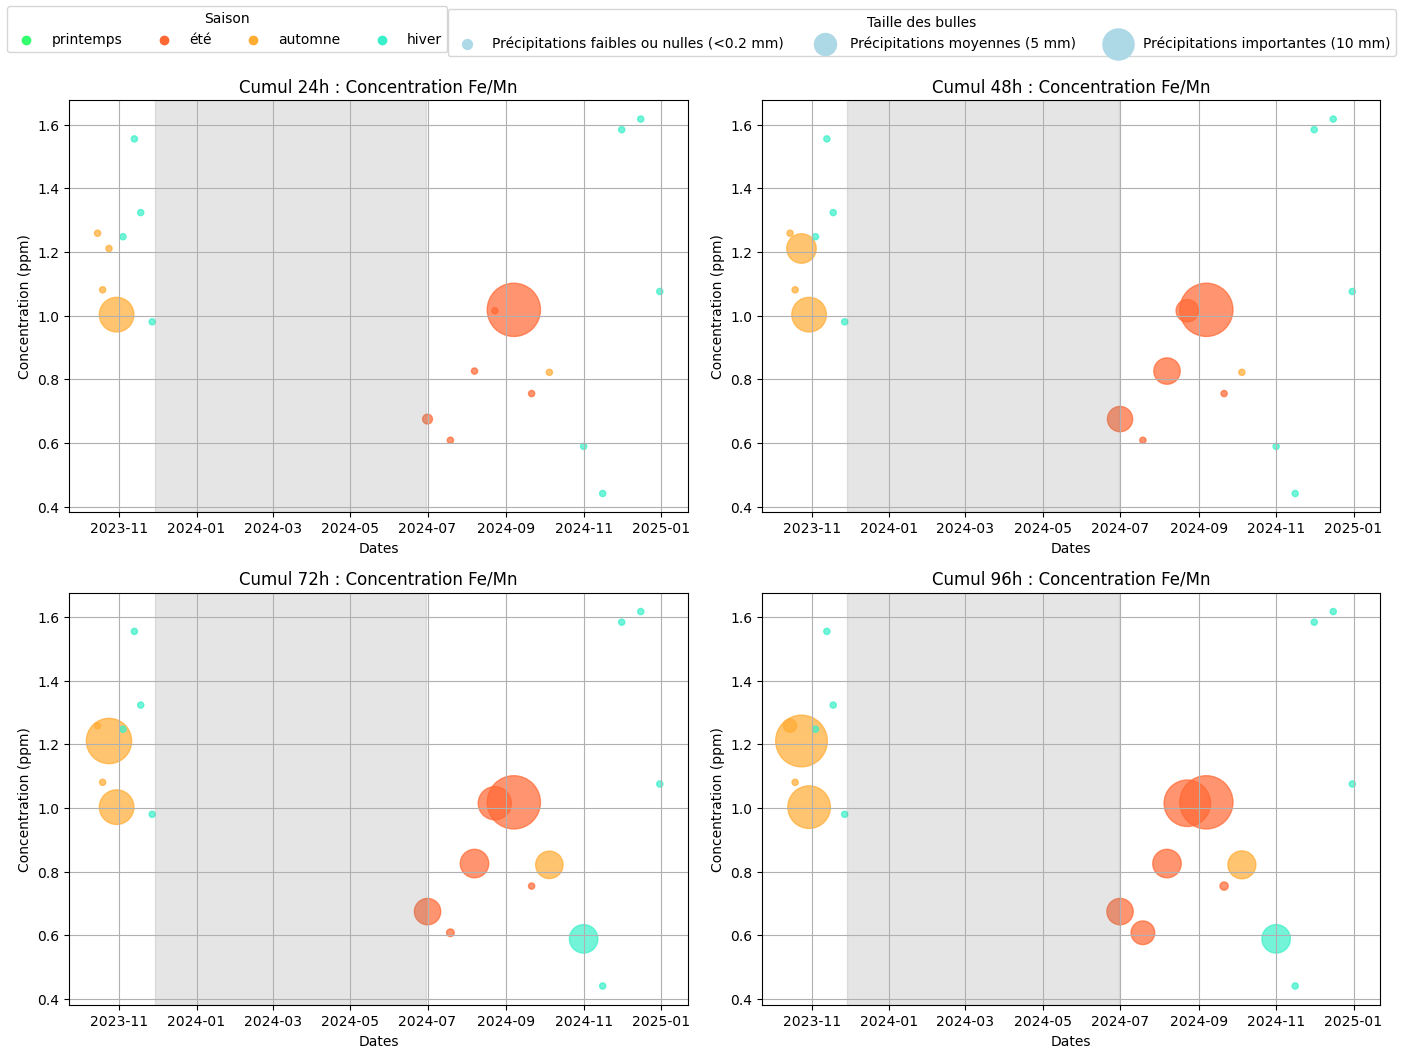

In [108]:
#du a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt
#bubble plot saisonnalite et impact precipitations
# Calcul ratio Fe/Mn
df['Fe/Mn_ppm'] = df['Fe_ppm_puits'] / df['Mn_ppm_puits']
# Palette de couleurs pour les saisons
couleurs_saison = {
    'printemps': '#33ff6e',
    'été': '#ff6833',
    'automne': '#ffac33',
    'hiver': '#38f0c9'
}
# Liste des cumuls de précipitations et leurs labels
cumuls_precipitations = {
    'Cumul_mm_24h': 'Cumul 24h',
    'Cumul_mm_48h': 'Cumul 48h',
    'Cumul_mm_72h': 'Cumul 72h',
    'Cumul_mm_96h': 'Cumul 96h'
}
# Créer une figure avec une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Rendre la grille accessible comme une liste

# Générer chaque bubble plot
for i, (colonne, label) in enumerate(cumuls_precipitations.items()):
    axes[i].scatter(
        df['Date_J_sample'], df['Fe/Mn_ppm'],
        s=df[colonne].apply(lambda x: max(x * 50, 20)),  # Taille minimale des bulles
        c=[couleurs_saison[saison] for saison in df['Season']],
        alpha=0.7)
    # Ajouter une zone grisée pour chaque subplot
    axes[i].axvspan(
        pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-30'),
        color='gray', alpha=0.2
    )
        
    # Ajouter des titres et ajustements
    axes[i].set_title(f'{label} : Concentration Fe/Mn', fontsize=12)
    axes[i].set_xlabel('Dates', fontsize=10)
    axes[i].set_ylabel('Concentration (ppm)', fontsize=10)
    axes[i].grid(True)

# Créer une liste des handles pour les saisons
handles = [plt.scatter([], [], color=couleur, label=saison) for saison, couleur in couleurs_saison.items()]

# Ajouter une légende avec tous les handles en une seule fois
fig.legend(handles=handles, title='Saison', loc='upper left', ncol=4, fontsize=10)

# Ajouter une légende pour la taille des bulles
fig.legend(
    handles=[
        plt.scatter([], [], s=50, color='lightblue', label='Précipitations faibles ou nulles (<0.2 mm)'),
        plt.scatter([], [], s=250, color='lightblue', label='Précipitations moyennes (5 mm)'),
        plt.scatter([], [], s=500, color='lightblue', label='Précipitations importantes (10 mm)')
    ],
    title='Taille des bulles', loc='lower right', bbox_to_anchor=(1, 1), ncol=3, fontsize=10
)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
# Afficher le graphique
plt.show()

<h5>✅Concentrations en Fer/Mn du puits vs températures - 2023-2024</h5>

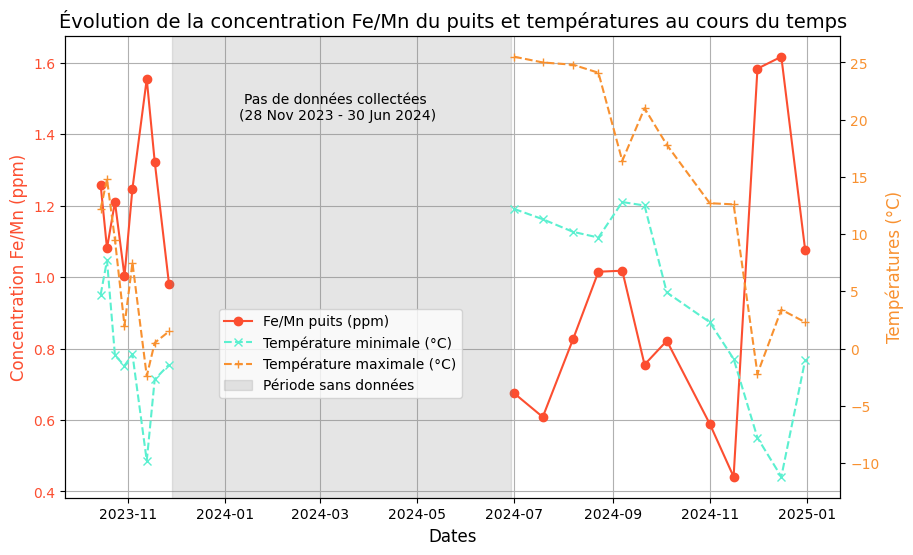

In [58]:
#du a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt

# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Premier axe Y (Fe)
ax1.plot(df['Date_J_sample'], df['Fe/Mn_ppm'], label='Fe/Mn puits (ppm)', color='#fc4e30',marker='o', linestyle='-')
ax1.set_xlabel('Dates', fontsize=12)
ax1.set_ylabel('Concentration Fe/Mn (ppm)', color='#fc4e30', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#fc4e30')
ax1.grid(True)
# Deuxième axe Y (Températures)
ax2 = ax1.twinx()  # Partage le même axe X
ax2.plot(df['Date_J_sample'], df['J_Temp_min'], label='Température minimale (°C)', color='#5bf0d0',marker='x', markersize=6,linestyle='--')
ax2.plot(df['Date_J_sample'], df['J_Temp_max'], label='Température maximale (°C)', color='#f89130',marker='+', markersize=6,linestyle='--')

ax2.set_ylabel('Températures (°C)', color='#f89130', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#f89130')

#Ajouter une annotation pour les echantillons manquants entre fin novembre 2023 et juillet 2024
# Créer un rectangle pour la période manquante
plt.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-29'),
    color='gray', alpha=0.2, label='Période sans données'
)
# Ajouter une annotation pour indiquer la période
plt.annotate(
    'Pas de données collectées \n(28 Nov 2023 - 30 Jun 2024)',
    xy=(pd.to_datetime('2024-03-12'), 20),# Position centrale pour la période
    ha='center', fontsize=10, color='black')
# Ajouter la légende complète
fig.legend(
    loc='center', fontsize=10,bbox_to_anchor=(0.4, 0.35))
plt.title('Évolution de la concentration Fe/Mn du puits et températures au cours du temps', fontsize=14)

# Afficher le graphique
plt.show()

>✔️Le ratio Fe/Mn semble fluctuer avec la température.
>
>✔️Le ratio Fe/Mn suit la fluctuation de température sauf à partir de mi-novembre (hiver 2023 et 2024).
>
>✔️Le ratio Fe/Mn augmente significativement lorsque la température chute en hiver.

<h5>✅Concentration Fe/Mn vs Température (amplitude) et cumul pluie 72h</h5>

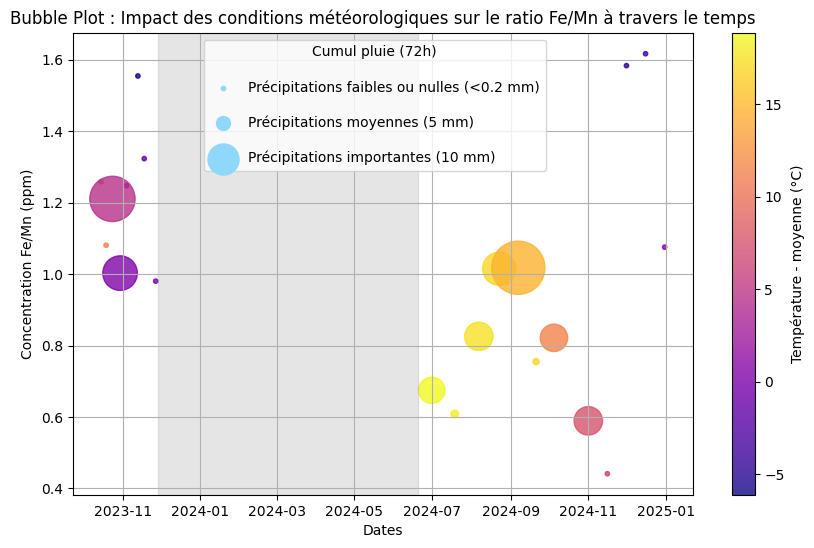

In [9]:
#du a une limitation de l'environnement cloud jupyterLite, importer librairie plt pour chaque plot
%matplotlib inline
import matplotlib.pyplot as plt
#calcul ratio Fe/Mn
df['Fe/Mn_ppm'] = df['Fe_ppm_puits'] / df['Mn_ppm_puits']
# Créer le bubble plot
plt.figure(figsize=(10, 6))

# Ajuster les tailles des bulles avec une taille minimale
taille_bulles = [max(10, size * 50) for size in df['Cumul_mm_72h']]
scatter =plt.scatter(
    df['Date_J_sample'], df['Fe/Mn_ppm'],
    c=df['J_Mean_Temp'],
    s=taille_bulles,
    alpha=0.8, cmap='plasma')

# Créer un rectangle pour la période manquante
plt.axvspan(
    pd.to_datetime('2023-11-29'), pd.to_datetime('2024-06-20'),
    color='gray', alpha=0.2)

# Ajouter une légende pour les tailles des bulles
handles = [
    plt.scatter([], [], s=10, color='#8fd8fc', label='Précipitations faibles ou nulles (<0.2 mm)'),
    plt.scatter([], [], s=100, color='#8fd8fc', label='Précipitations moyennes (5 mm)'),
    plt.scatter([], [], s=500, color='#8fd8fc', label='Précipitations importantes (10 mm)')]

plt.legend(handles=handles, title="Cumul pluie (72h)", loc="upper left", bbox_to_anchor=(0.2, 1), labelspacing=1.5)
# Ajouter une barre de couleur
plt.colorbar(scatter, label="Température - moyenne (°C)")

# Personnaliser le graphique
plt.xlabel("Dates")
plt.ylabel("Concentration Fe/Mn (ppm)")
plt.title("Bubble Plot : Impact des conditions météorologiques sur le ratio Fe/Mn à travers le temps")
plt.grid(True)

# Afficher le graphique
plt.show()

<h3>🌤️Corrélation Fe/Mn et conditions météorologiques (hors hiver)</h3>

⚠️ La taille de l'échantillon est petite⚠️

In [117]:
# Filtrer les données hors hiver
df_hors_hiver = df[df['Season'] != 'hiver']

<h5>✅Corrélation Fe/Mn vs température</h5>

In [118]:
from scipy.stats import pearsonr

#calculer 
df_hors_hiver['Fe/Mn']=df_hors_hiver['Fe_ppm_puits']/df_hors_hiver['Mn_ppm_puits']
# Extraire les colonnes pertinentes hors hiver
fe_mn = df_hors_hiver['Fe/Mn']
temperature = df_hors_hiver['J_Amplitude']

# Calculer la corrélation
corr_fe_mn_temp, p_value_temp = pearsonr(fe_mn, temperature)
print(f"Corrélation Fe/Mn vs Température : {corr_fe_mn_temp}, p-valeur : {p_value_temp}")

<ipython-input-118-dbb58c058967>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hors_hiver['Fe/Mn']=df_hors_hiver['Fe_ppm_puits']/df_hors_hiver['Mn_ppm_puits']


Corrélation Fe/Mn vs Température : -0.5030957002012117, p-valeur : 0.11469252769783639


>Pas de corrélation

<h5>✅Corrélation Fe/Mn vs précipitations cumul 72h</h5>

In [119]:
# Extraire les colonnes pertinentes hors hiver
cumul_pluie_72h = df_hors_hiver['Cumul_mm_72h']

# Calculer la corrélation
corr_fe_mn_pluie, p_value_pluie = pearsonr(fe_mn, cumul_pluie_72h)
print(f"Corrélation Fe/Mn vs Cumul pluie 72h : {corr_fe_mn_pluie}, p-valeur : {p_value_pluie}")

Corrélation Fe/Mn vs Cumul pluie 72h : 0.3142595823925637, p-valeur : 0.34661316326033026


>Pas de corrélation

<h3>🧪Concentrations en Mn du puits vs post-calcite vs post-filox</h3>

In [113]:
# Sélection des variables
df_mn = df[['Mn_ppm_puits','Mn_ppm_post_calcite','Mn_ppm_post_filox']]
# Conversion en format long
df_long = df_mn.melt(var_name='Groupe', value_name='Concentration_Mn')
print(df_long)

               Groupe  Concentration_Mn
0        Mn_ppm_puits              4.37
1        Mn_ppm_puits              4.33
2        Mn_ppm_puits              4.32
3        Mn_ppm_puits              3.49
4        Mn_ppm_puits              3.23
..                ...               ...
58  Mn_ppm_post_filox              2.42
59  Mn_ppm_post_filox              2.46
60  Mn_ppm_post_filox              2.41
61  Mn_ppm_post_filox              1.36
62  Mn_ppm_post_filox              1.57

[63 rows x 2 columns]


In [122]:
from scipy.stats import f_oneway

#enlever les NaN
df_cleaned = df.dropna(subset=['Mn_ppm_puits', 'Mn_ppm_post_calcite', 'Mn_ppm_post_filox'])

# Extraire les groupes
puits = df_cleaned['Mn_ppm_puits']
calcite = df_cleaned['Mn_ppm_post_calcite']
filox = df_cleaned['Mn_ppm_post_filox']

# Test ANOVA
f_stat, p_value = f_oneway(puits, calcite, filox)
print(f"Statistique F : {f_stat}, p-valeur : {p_value}")

# Interprétation
if p_value < 0.05:
    print("Il existe une différence significative entre les groupes.")
else:
    print("Pas de différence significative entre les groupes.")

Statistique F : 0.004648378954011211, p-valeur : 0.995362806275189
Pas de différence significative entre les groupes.


<h3>💡Conclusions</h3>

<h4>Influence météorologique sur la qualité de l'eau du puits</h4>

* Il existe une influence des conditions météorologiques sur la qualité de l'eau du puits, en particulier les précipitations - pluie - cumulées 72h. 
L'apport d'eau fraiche qui s'infiltre dans le sol influence la quantite d'oxygène dans l'eau.
L'oxygène intervient dans l'oxydation du fer par voie chimique et biologique (ferro-bactéries). 
En hiver, en absence de précipitations, le niveau d'oxygène diminue et le fer se retrouve sous forme dissoute (non oxydée) qui s'accumule dans l'eau.  
La mesure du niveau d'oxygénation de l'eau permettrait de confirmer cette hypothèse.

* La qualité de l'eau semble influencée par les températures. Cependant, il faudrait mesurer la température de l'eau du puits pour corréler ce facteur au ratio Fe/Mn.

* La calcite élimine totalement le fer. L'hypothèse d'une filtration par des ferro-bactéries qui auraient colonisé le média est envisagée. La présence de bactéries ferreuses est fortement suspectée dans le sol car des manifestations sont visibles notamment dans le drain français.
Cette hypothèse de filtration biologique requiert des prélèvements microbiologiques sur la calcite pour être confirmée. La mise en perspective avec la température de l'eau du puits pourrait aussi corroborer l'oxydation biologique du fer.

<h4>Corrélation Fe/Mn et conditions météorologiques </h4>

⚠️L'échantillon est petit.⚠️

Il n’y a pas de corrélation statistiquement significative entre Fe/Mn et la température (hors hiver).
Il n’y a pas de corrélation statistiquement significative entre Fe/Mn et les précipitations (hors hiver).
L'échantillon étant petit, cela limite la capacité à détecter des relations même si elles existent. Avec un plus grand nombre de données, le résultat pourrait potentiellement changer.

<h4>Concentration en Mn dans le puits, post calcite et post filox</h4>

⚠️L'échantillon est petit.⚠️

Il n'y a pas de différence significative entre les concentrations de Mn du puits, en sortie de calcite et en sortie de filox. Le relargage observé après le Filox est peut-être dû au hasard.
